In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [111]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
np.corrcoef(zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [112]:
b = ((np.mean(zp*ks)) - np.mean(zp)*np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

In [113]:
a = np.mean(ks) - b*np.mean(zp)
a

444.1773573243596

In [114]:
ks_hat = a + b*zp
ks_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

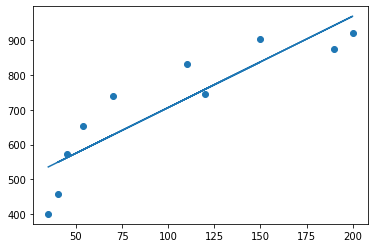

In [115]:
plt.scatter(zp, ks)
plt.plot(zp, ks_hat)

In [116]:
mse = ((ks - ks_hat)**2).sum()/len(zp)
mse

6470.414201176658

In [117]:
zp = zp.reshape(10,1)
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [118]:
ks = ks.reshape(10,1)
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [119]:
zp_1 = np.hstack([np.ones((10,1)), zp])
zp_1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [120]:
B = np.dot(np.linalg.inv(np.dot(zp_1.T,zp_1)), zp_1.T@ks)
B

array([[444.17735732],
       [  2.62053888]])

In [121]:
B_1 = np.dot(np.linalg.inv(np.dot(zp.T,zp)), zp.T@ks)
B_1

array([[5.88982042]])

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [150]:
def mse_(B1, y = ks, X = zp, n = len(zp)):
    return np.sum((B1*X - y)**2)/n

In [182]:
alpha = 1e-6
alpha

1e-06

In [192]:
B1 = 0.1
n = len(zp)
mse_(B1)

518336.326

In [193]:
for i in range(3000): 
    B1 -=alpha*(2/n)*np.sum((B1*zp - ks)*ks)
    if i%100==0:
        print(f'iter {i}, B1 = {B1}, mse = {mse_(B1)}') 

iter 0, B1 = 1.15262546, mse = 365677.76068543654
iter 100, B1 = 6.586340821105838, mse = 63200.447355876255
iter 200, B1 = 6.586340931974556, mse = 63200.44948359857
iter 300, B1 = 6.586340931974556, mse = 63200.44948359857
iter 400, B1 = 6.586340931974556, mse = 63200.44948359857
iter 500, B1 = 6.586340931974556, mse = 63200.44948359857
iter 600, B1 = 6.586340931974556, mse = 63200.44948359857
iter 700, B1 = 6.586340931974556, mse = 63200.44948359857
iter 800, B1 = 6.586340931974556, mse = 63200.44948359857
iter 900, B1 = 6.586340931974556, mse = 63200.44948359857
iter 1000, B1 = 6.586340931974556, mse = 63200.44948359857
iter 1100, B1 = 6.586340931974556, mse = 63200.44948359857
iter 1200, B1 = 6.586340931974556, mse = 63200.44948359857
iter 1300, B1 = 6.586340931974556, mse = 63200.44948359857
iter 1400, B1 = 6.586340931974556, mse = 63200.44948359857
iter 1500, B1 = 6.586340931974556, mse = 63200.44948359857
iter 1600, B1 = 6.586340931974556, mse = 63200.44948359857
iter 1700, B1 

In [188]:
mse_(6.586340931974556)

63200.44948359857

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

если известна сигма (или дисперсия) используем значения Лапласса, если неизвестны то Стьюдента